In [2]:
import pandas as pd

In [3]:
# load data

meta_data = pd.read_csv('raw/meta/25K_tracks_meta.csv')
feature_data = pd.read_csv('raw/features/all_features_medium_with_var.csv')

In [4]:
meta_data.shape

(25000, 54)

In [5]:
feature_data.shape

(24985, 79)

In [6]:
meta_data.head()

,Unnamed: 0,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,...,track_information,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title
0,1,2,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,...,NaN,4656.0,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293.0,NaN,3.0,NaN,[],Food
1,2,3,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,...,NaN,1470.0,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514.0,NaN,4.0,NaN,[],Electric Ave
2,3,5,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,...,NaN,1933.0,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151.0,NaN,6.0,NaN,[],This World
3,4,10,0.0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4.0,6.0,NaN,47632.0,...,NaN,54881.0,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135.0,NaN,1.0,NaN,[],Freeway
4,10,134,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,...,NaN,1126.0,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,943.0,NaN,5.0,NaN,[],Street Music


In [7]:
feature_data.head()

,Unnamed: 0,track_id,key,scale,strength,tempo,rms_harmonic_mean,rms_harmonic_var,rms_percussive_mean,rms_percussive_var,...,MFCC_11_var,MFCC_12_var,MFCC_13_var,MFCC_14_var,MFCC_15_var,MFCC_16_var,MFCC_17_var,MFCC_18_var,MFCC_19_var,MFCC_20_var
0,0,2,C,minor,0.820405,161.499023,0.060801,0.000606,0.102429,0.006546,...,87.048584,114.94784,75.481260,65.706130,53.539734,50.610130,53.584140,53.726870,53.249638,41.468660
1,1,3,G,minor,0.817010,86.132812,0.068484,0.001239,0.065604,0.002172,...,51.888680,64.36989,69.203100,68.990480,61.594390,52.908260,64.763330,48.977910,51.463720,43.103836
2,2,5,C#,minor,0.831993,99.384014,0.079553,0.002230,0.085417,0.003846,...,98.111730,72.85849,89.889824,56.416400,56.527650,66.605540,45.467102,44.914455,65.224960,65.556360
3,3,10,F#,major,0.945823,112.347147,0.135624,0.000600,0.081036,0.003281,...,43.031660,35.30657,33.088593,31.829184,31.379726,46.397903,32.052837,46.061210,31.413872,32.891766
4,4,134,Bb,major,0.750141,135.999178,0.088261,0.001123,0.094477,0.003812,...,74.750595,65.04158,55.827350,49.834393,56.149130,53.382088,54.343760,44.785503,42.397964,43.048054


In [8]:
# extract acoustic featuress
music_features = [feature for feature in feature_data.columns if feature not in ['Unnamed: 0', 'track_id', 'strength']]


In [9]:
len(music_features)

76

In [10]:
meta_data.columns

Index(['Unnamed: 0', 'track_id', 'album_comments', 'album_date_created',
       'album_date_released', 'album_engineer', 'album_favorites', 'album_id',
       'album_information', 'album_listens', 'album_producer', 'album_tags',
       'album_title', 'album_tracks', 'album_type', 'artist_active_year_begin',
       'artist_active_year_end', 'artist_associated_labels', 'artist_bio',
       'artist_comments', 'artist_date_created', 'artist_favorites',
       'artist_id', 'artist_latitude', 'artist_location', 'artist_longitude',
       'artist_members', 'artist_name', 'artist_related_projects',
       'artist_tags', 'artist_website', 'artist_wikipedia_page', 'set_split',
       'set_subset', 'track_bit_rate', 'track_comments', 'track_composer',
       'track_date_created', 'track_date_recorded', 'track_duration',
       'track_favorites', 'track_genre_top', 'track_genres',
       'track_genres_all', 'track_information', 'track_interest',
       'track_language_code', 'track_license', 'trac

In [11]:
# define possible labels and extra features from the meta data
labels = ['track_genre_top'] 
extra_features = ['track_title', 'artist_name', 'set_split', 'set_subset']

In [12]:
merged_df = pd.merge(meta_data, feature_data, on='track_id', how='left')

In [13]:
len(merged_df)

25000

In [14]:
# define final columns that are included in final dataset to create model.
final_columns = ['track_id'] + labels + extra_features + music_features
final_columns

['track_id',
 'track_genre_top',
 'track_title',
 'artist_name',
 'set_split',
 'set_subset',
 'key',
 'scale',
 'tempo',
 'rms_harmonic_mean',
 'rms_harmonic_var',
 'rms_percussive_mean',
 'rms_percussive_var',
 'spectral_centroid_mean',
 'spectral_centroid_var',
 'spectral_rolloff_mean',
 'spectral_rolloff_var',
 'zero_crossings',
 'chroma_stft_0_mean',
 'chroma_stft_1_mean',
 'chroma_stft_2_mean',
 'chroma_stft_3_mean',
 'chroma_stft_4_mean',
 'chroma_stft_5_mean',
 'chroma_stft_6_mean',
 'chroma_stft_7_mean',
 'chroma_stft_8_mean',
 'chroma_stft_9_mean',
 'chroma_stft_10_mean',
 'chroma_stft_11_mean',
 'chroma_stft_0_var',
 'chroma_stft_1_var',
 'chroma_stft_2_var',
 'chroma_stft_3_var',
 'chroma_stft_4_var',
 'chroma_stft_5_var',
 'chroma_stft_6_var',
 'chroma_stft_7_var',
 'chroma_stft_8_var',
 'chroma_stft_9_var',
 'chroma_stft_10_var',
 'chroma_stft_11_var',
 'MFCC_1_mean',
 'MFCC_2_mean',
 'MFCC_3_mean',
 'MFCC_4_mean',
 'MFCC_5_mean',
 'MFCC_6_mean',
 'MFCC_7_mean',
 'MFCC_8_

In [15]:
final_df = merged_df[final_columns]

In [16]:
final_df.head()

,track_id,track_genre_top,track_title,artist_name,set_split,set_subset,key,scale,tempo,rms_harmonic_mean,...,MFCC_11_var,MFCC_12_var,MFCC_13_var,MFCC_14_var,MFCC_15_var,MFCC_16_var,MFCC_17_var,MFCC_18_var,MFCC_19_var,MFCC_20_var
0,2,Hip-Hop,Food,AWOL,training,small,C,minor,161.499023,0.060801,...,87.048584,114.94784,75.481260,65.706130,53.539734,50.610130,53.584140,53.726870,53.249638,41.468660
1,3,Hip-Hop,Electric Ave,AWOL,training,medium,G,minor,86.132812,0.068484,...,51.888680,64.36989,69.203100,68.990480,61.594390,52.908260,64.763330,48.977910,51.463720,43.103836
2,5,Hip-Hop,This World,AWOL,training,small,C#,minor,99.384014,0.079553,...,98.111730,72.85849,89.889824,56.416400,56.527650,66.605540,45.467102,44.914455,65.224960,65.556360
3,10,Pop,Freeway,Kurt Vile,training,small,F#,major,112.347147,0.135624,...,43.031660,35.30657,33.088593,31.829184,31.379726,46.397903,32.052837,46.061210,31.413872,32.891766
4,134,Hip-Hop,Street Music,AWOL,training,medium,Bb,major,135.999178,0.088261,...,74.750595,65.04158,55.827350,49.834393,56.149130,53.382088,54.343760,44.785503,42.397964,43.048054


In [17]:
len(final_df.track_id.unique())

25000

<Axes: >

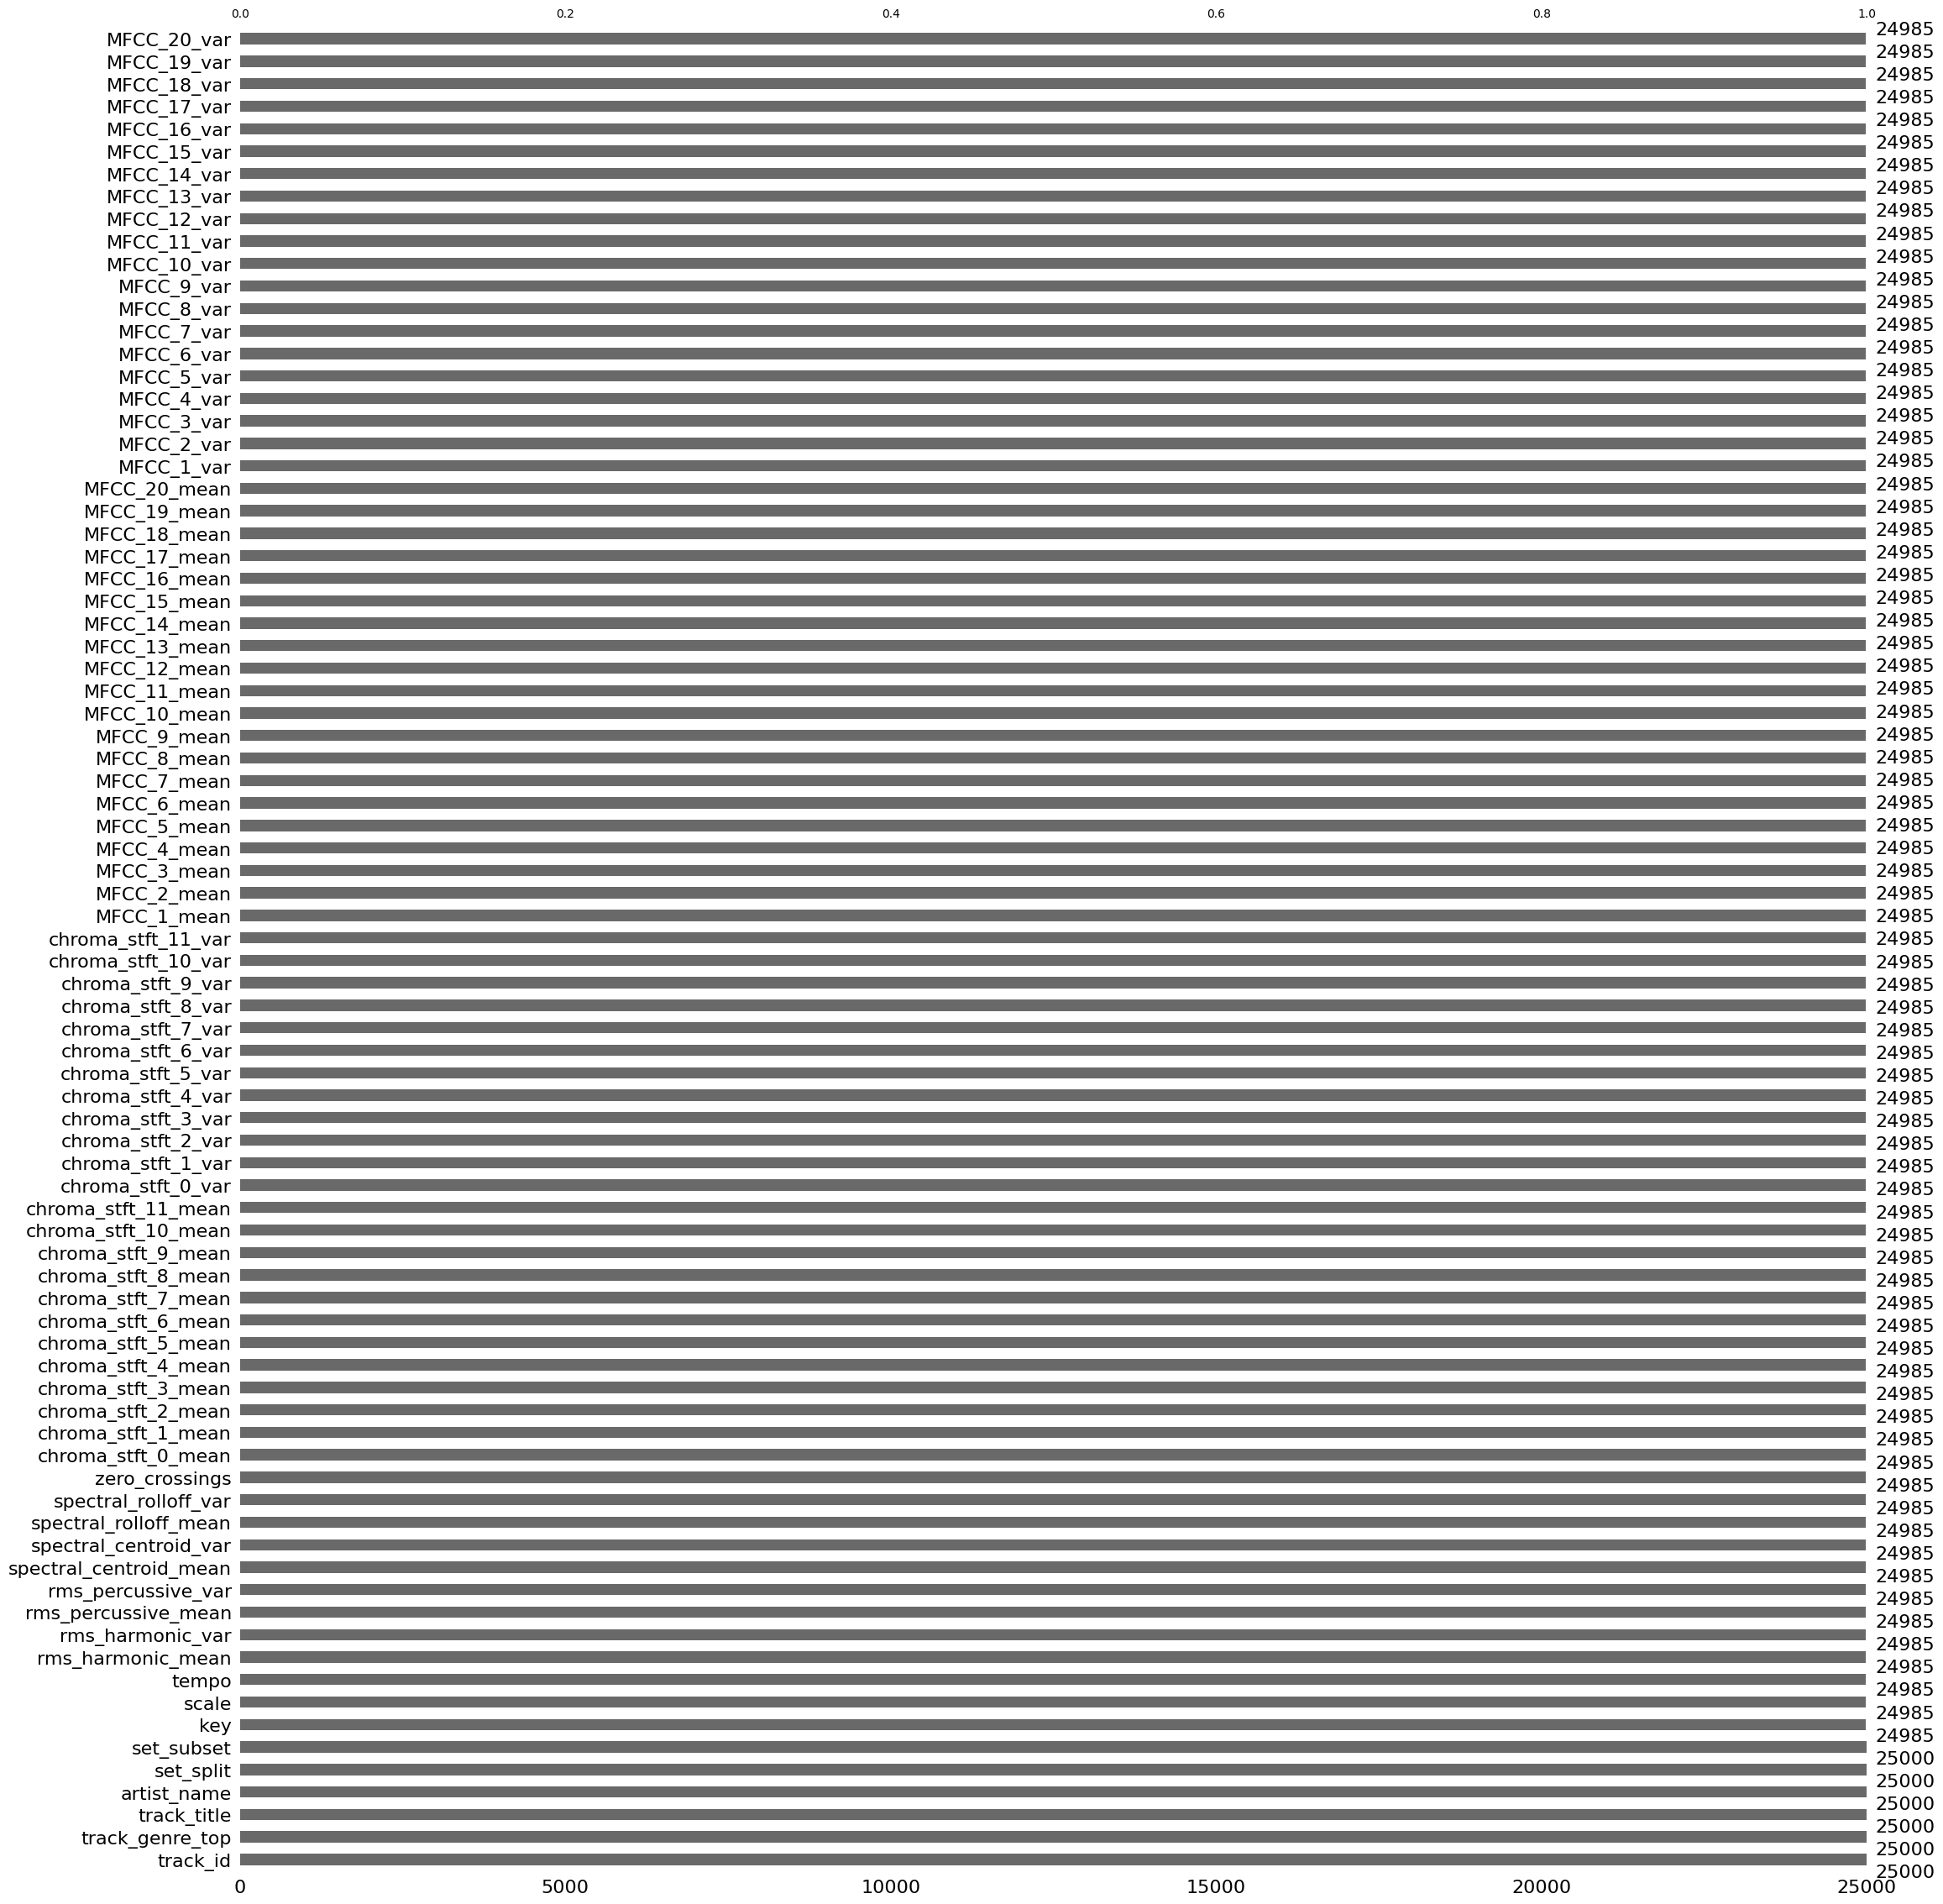

In [18]:
# check null values
import missingno as mno
mno.bar(final_df)

In [19]:
# 1. Drop rows with null values
final_df.dropna(inplace=True)

/var/folders/np/f11s751j4dj_y_1cj4yxydpwpsr474/T/ipykernel_61395/898899426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.dropna(inplace=True)


<Axes: >

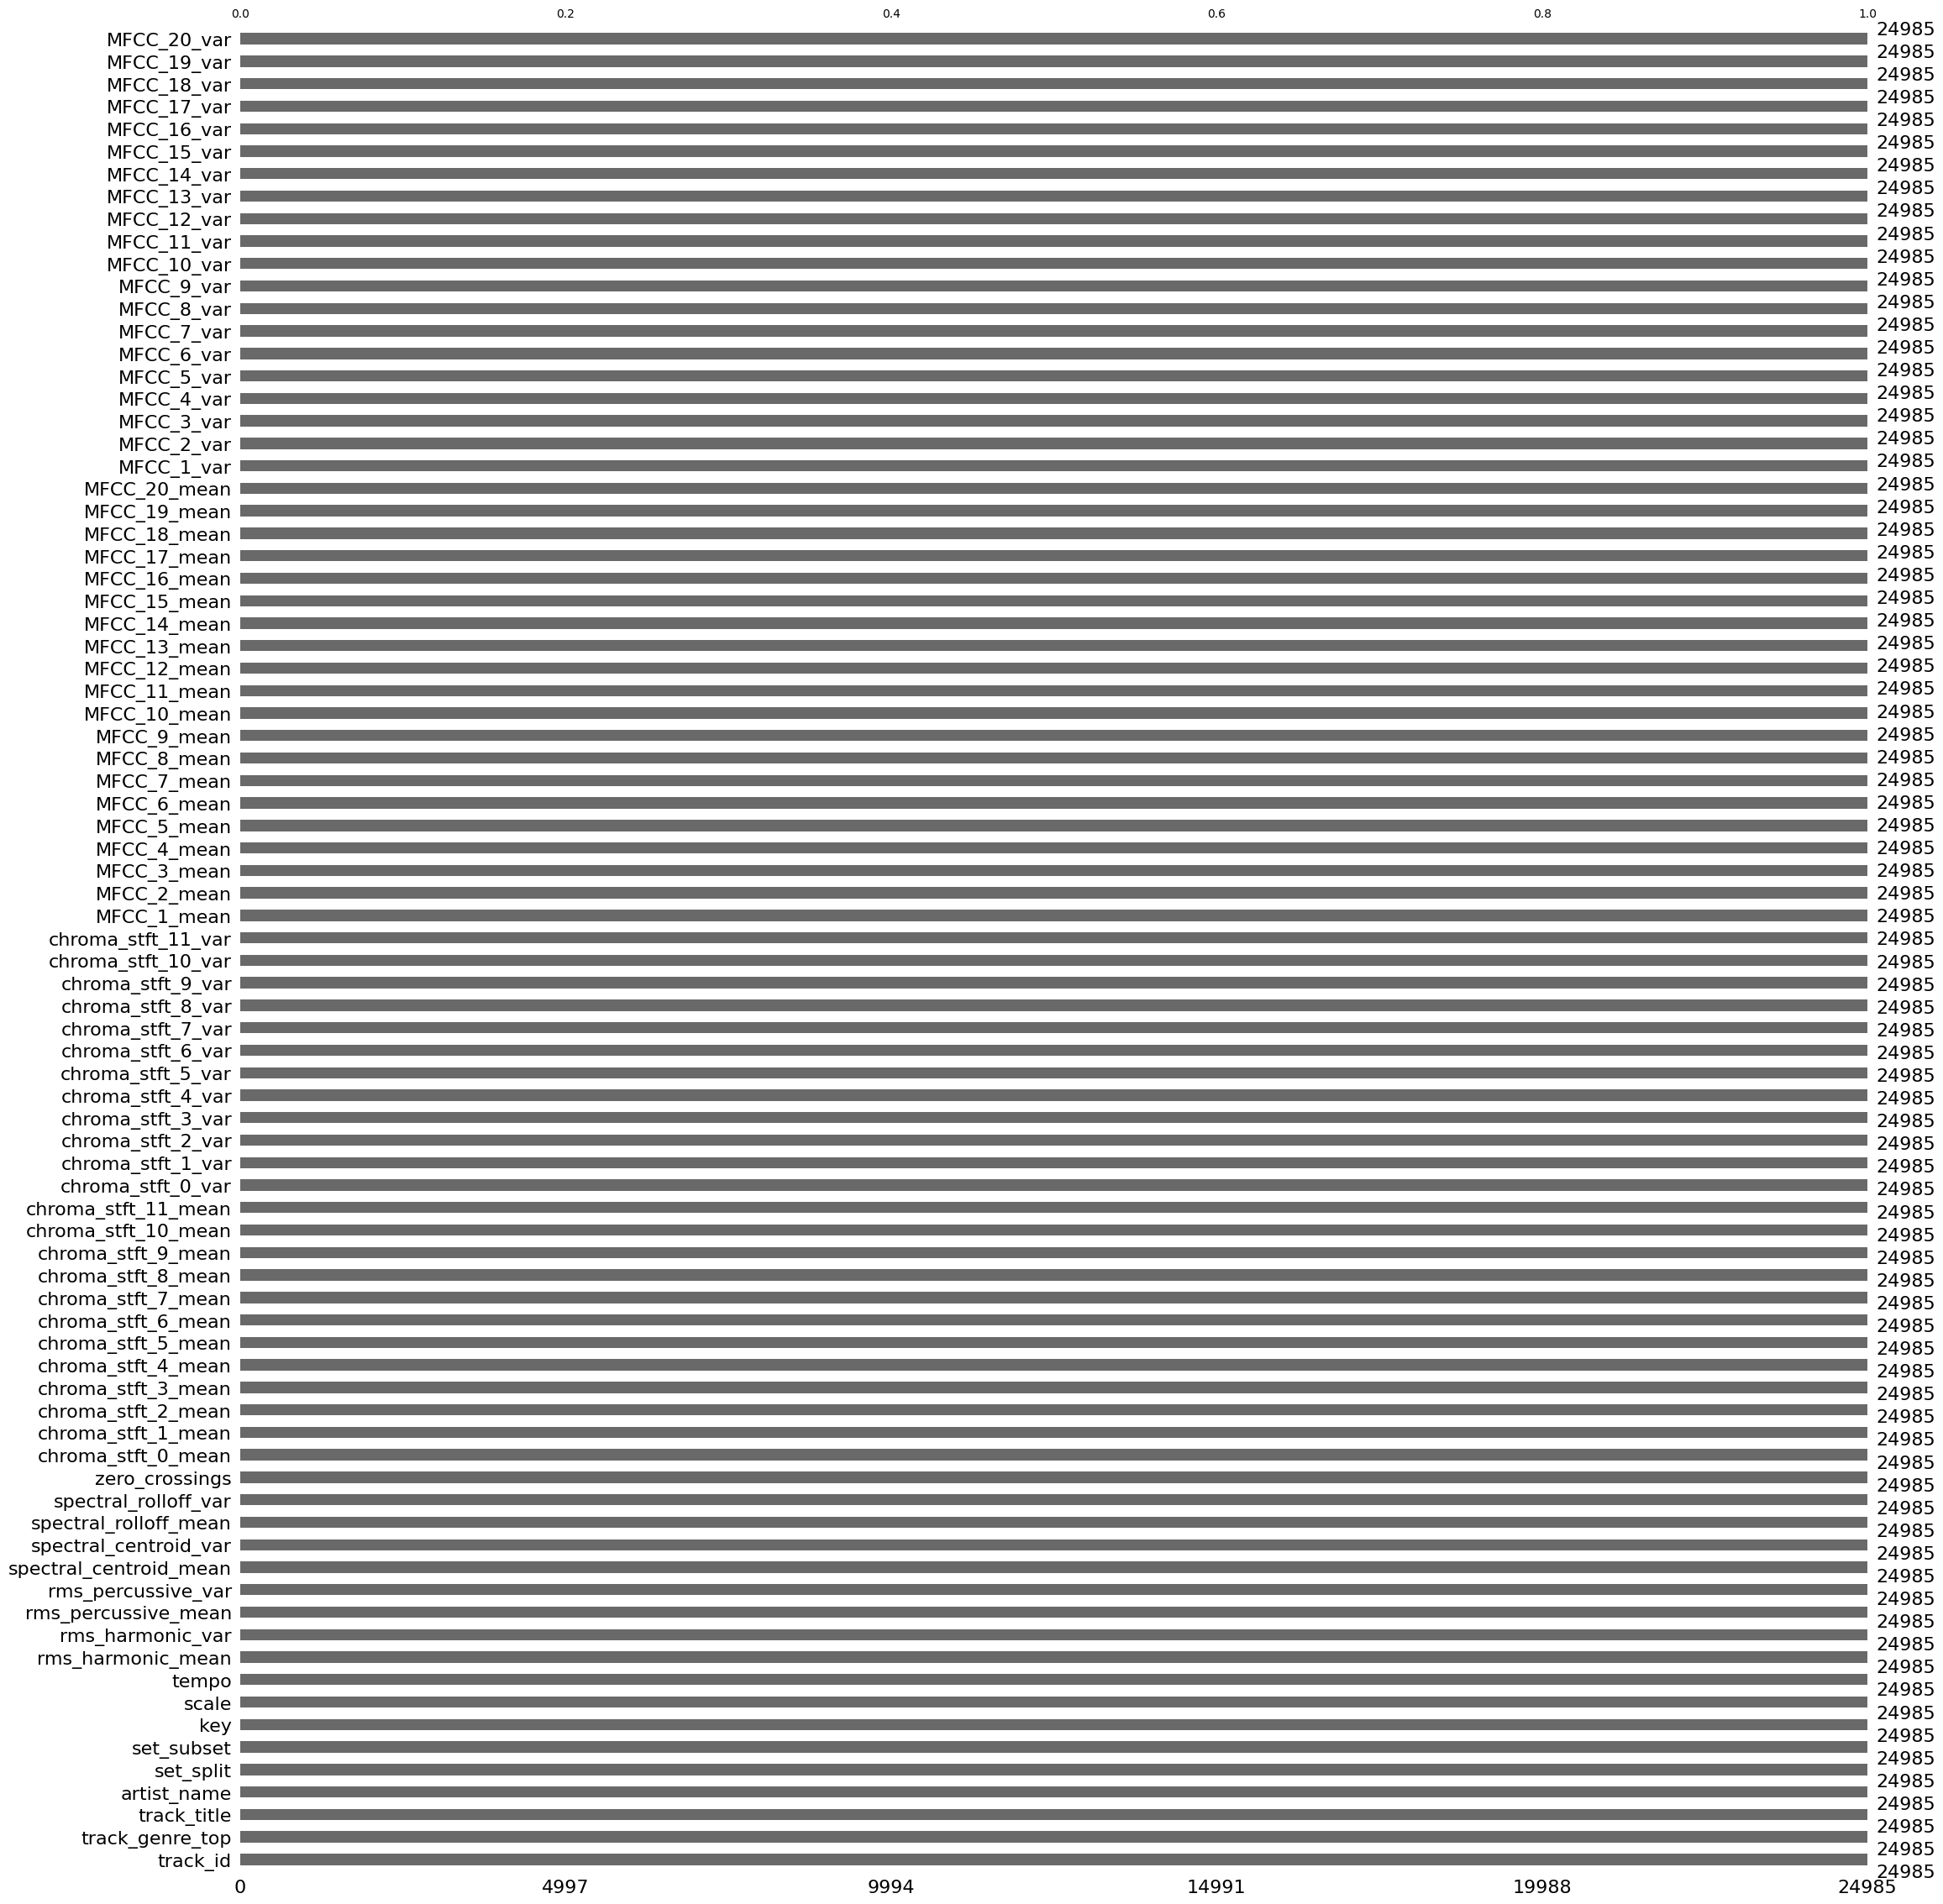

In [20]:
mno.bar(final_df)

In [21]:
len(final_df)

24985

In [23]:
# check distribution
final_df['track_genre_top'].value_counts()

Rock                   7098
Electronic             6311
Experimental           2250
Hip-Hop                2197
Folk                   1518
Instrumental           1349
Pop                    1186
International          1018
Classical               619
Old-Time / Historic     510
Jazz                    384
Country                 178
Soul-RnB                154
Spoken                  118
Blues                    74
Easy Listening           21
Name: track_genre_top, dtype: int64

In [25]:
# remove genres with small samples.
final_df = final_df[~final_df['track_genre_top'].isin(['Spoken','Blues','Easy Listening'])]
final_df

,track_id,track_genre_top,track_title,artist_name,set_split,set_subset,key,scale,tempo,rms_harmonic_mean,...,MFCC_11_var,MFCC_12_var,MFCC_13_var,MFCC_14_var,MFCC_15_var,MFCC_16_var,MFCC_17_var,MFCC_18_var,MFCC_19_var,MFCC_20_var
0,2,Hip-Hop,Food,AWOL,training,small,C,minor,161.499023,0.060801,...,87.048584,114.947840,75.481260,65.706130,53.539734,50.610130,53.584140,53.726870,53.249638,41.468660
1,3,Hip-Hop,Electric Ave,AWOL,training,medium,G,minor,86.132812,0.068484,...,51.888680,64.369890,69.203100,68.990480,61.594390,52.908260,64.763330,48.977910,51.463720,43.103836
2,5,Hip-Hop,This World,AWOL,training,small,C#,minor,99.384014,0.079553,...,98.111730,72.858490,89.889824,56.416400,56.527650,66.605540,45.467102,44.914455,65.224960,65.556360
3,10,Pop,Freeway,Kurt Vile,training,small,F#,major,112.347147,0.135624,...,43.031660,35.306570,33.088593,31.829184,31.379726,46.397903,32.052837,46.061210,31.413872,32.891766
4,134,Hip-Hop,Street Music,AWOL,training,medium,Bb,major,135.999178,0.088261,...,74.750595,65.041580,55.827350,49.834393,56.149130,53.382088,54.343760,44.785503,42.397964,43.048054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,155297,Instrumental,Nebula Reborn,Alex Mason/BlackSunAeon Music,training,medium,D,major,123.046875,0.038447,...,22.232323,24.510690,26.948805,23.327662,22.490122,25.986118,23.694788,20.519924,22.553629,21.855843
24996,155298,Folk,An Idiot Abroad,Greg Atkinson,training,medium,G,major,129.199219,0.139233,...,80.172745,54.575260,112.987770,62.619858,49.619970,50.006454,50.158146,65.567490,81.833900,39.568230
24997,155306,Folk,Tiny Man,Greg Atkinson,training,medium,Bb,major,103.359375,0.116513,...,58.993520,82.817200,108.759140,68.722510,54.298910,56.095505,41.131850,35.043724,60.897583,55.925217
24998,155307,Experimental,Kolka,AWOTT,training,medium,C,minor,117.453835,0.085435,...,81.952720,81.642800,104.186100,73.546265,239.670580,197.069370,90.075540,57.600407,88.707726,54.907215


In [26]:
# one-hot encoding
ohe_final_df = pd.get_dummies(final_df, columns=['key', 'scale'])
ohe_final_df

,track_id,track_genre_top,track_title,artist_name,set_split,set_subset,tempo,rms_harmonic_mean,rms_harmonic_var,rms_percussive_mean,...,key_C,key_C#,key_D,key_E,key_Eb,key_F,key_F#,key_G,scale_major,scale_minor
0,2,Hip-Hop,Food,AWOL,training,small,161.499023,0.060801,0.000606,0.102429,...,1,0,0,0,0,0,0,0,0,1
1,3,Hip-Hop,Electric Ave,AWOL,training,medium,86.132812,0.068484,0.001239,0.065604,...,0,0,0,0,0,0,0,1,0,1
2,5,Hip-Hop,This World,AWOL,training,small,99.384014,0.079553,0.002230,0.085417,...,0,1,0,0,0,0,0,0,0,1
3,10,Pop,Freeway,Kurt Vile,training,small,112.347147,0.135624,0.000600,0.081036,...,0,0,0,0,0,0,1,0,1,0
4,134,Hip-Hop,Street Music,AWOL,training,medium,135.999178,0.088261,0.001123,0.094477,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,155297,Instrumental,Nebula Reborn,Alex Mason/BlackSunAeon Music,training,medium,123.046875,0.038447,0.000094,0.009430,...,0,0,1,0,0,0,0,0,1,0
24996,155298,Folk,An Idiot Abroad,Greg Atkinson,training,medium,129.199219,0.139233,0.003167,0.034027,...,0,0,0,0,0,0,0,1,1,0
24997,155306,Folk,Tiny Man,Greg Atkinson,training,medium,103.359375,0.116513,0.003872,0.020412,...,0,0,0,0,0,0,0,0,1,0
24998,155307,Experimental,Kolka,AWOTT,training,medium,117.453835,0.085435,0.001713,0.038334,...,1,0,0,0,0,0,0,0,0,1


In [27]:
ohe_final_df_training = ohe_final_df[ohe_final_df['set_split'] == 'training']
ohe_final_df_test = ohe_final_df[ohe_final_df['set_split'] == 'test']
ohe_final_df_validate = ohe_final_df[ohe_final_df['set_split'] == 'validation']

In [28]:
ohe_final_df.shape

(24772, 94)

In [29]:
ohe_final_df_training.shape

(19744, 94)

In [30]:
ohe_final_df_test.shape

(2546, 94)

In [31]:
ohe_final_df_validate.shape

(2482, 94)

In [32]:
ohe_final_df_training.to_csv('processed/ohe_25K_tracks_features_and_labels_for_training.csv')
ohe_final_df_test.to_csv('processed/ohe_25K_tracks_features_and_labels_for_test.csv')
ohe_final_df_validate.to_csv('processed/ohe_25K_tracks_features_and_labels_for_validation.csv')
ohe_final_df.to_csv('processed/ohe_25K_tracks_features_and_labels_all.csv')